# Linguagem Natural parte 1 Introdução a NLP com análise de sentimento

## Objetivos
* Aprenda conceitos fundamentais do Processamento de Linguagem Natural.
* Realize Análise de Sentimento de modo automatizado.
* Uma arquitetura para classificação de sentimentos.
* Como criar visualizações para facilitar a análise de dados textuais.
* Comece a utilizar o NLTK uma das principais bibliotecas python para PLN.
* Aprenda boas práticas voltadas ao PLN.

Link:https://cursos.alura.com.br/course/introducao-a-nlp-com-analise-de-sentimento

## Importando as bibliotecas necessárias

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

## Carregando os dados e fazendo analise explorátorio dos dados

link do dataset: https://www.kaggle.com/luisfredgs/imdb-ptbr

In [2]:
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
print(f'O dataset possui {df.shape[0]} observações e {df.shape[1]} atributos')

O dataset possui 49459 observações e 4 atributos


In [4]:
X = df.text_pt
y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)
acuracia = regressao_logistica.score(X_test, y_test)
print(f'Acurácia: {acuracia:0.2%}')

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [5]:
classificacao = df['sentiment'].replace(['neg', 'pos'], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [6]:
df['classificacao'] = classificacao
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [7]:
texto_exemplo = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto_exemplo)

In [8]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [9]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_esparsa.head()

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.text_pt)
bag_of_words.shape

(49459, 50)

In [12]:
def classificar_texto(df, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(df[coluna_texto])

    X = bag_of_words
    y = df[coluna_classificacao]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)
    regressao_logistica.score(X_test, y_test)
    
    return regressao_logistica.score(X_test, y_test)
    
acuracia = classificar_texto(df, 'text_pt', 'classificacao')

print(f'Acurácia: {acuracia:0.2%}')

Acurácia: 65.83%


In [24]:
todas_as_palavras = ' '.join([palavra for palavra in df.text_pt])
len(todas_as_palavras)

63448424

In [59]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(todas_as_palavras)

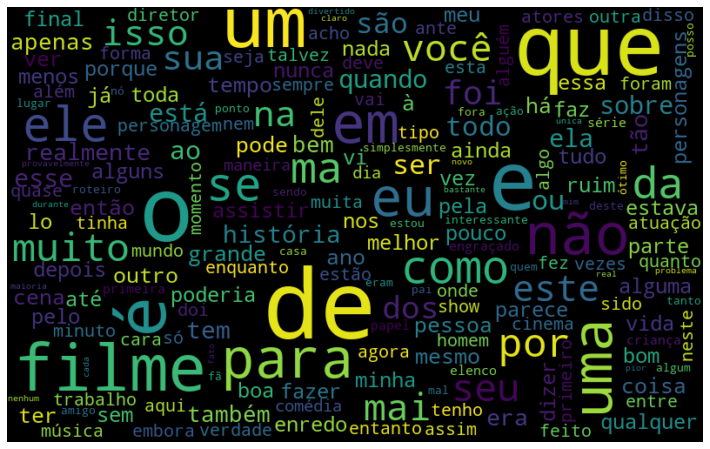

In [60]:
fig, ax = plt.subplots(figsize=(14,8))
ax.imshow(nuvem_palavras, interpolation='bilinear')
ax.axis('off')
plt.show()

In [124]:
def gera_nuvem_palavra(df, coluna_texto, sentimento):
    textos_filtrados = df.query("sentiment == @sentimento")
    todas_palavras = ' '.join([palavra for palavra in textos_filtrados[coluna_texto]])
    
    nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(todas_palavras)
    
    fig, ax = plt.subplots(figsize=(14,8))
    ax.imshow(nuvem_palavras, interpolation='bilinear')
    ax.axis('off')
    plt.show()

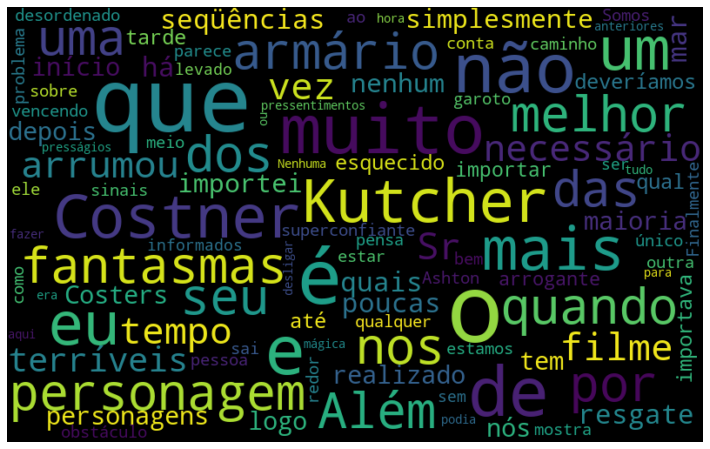

In [125]:
gera_nuvem_palavra(df, 'text_pt', 'pos')

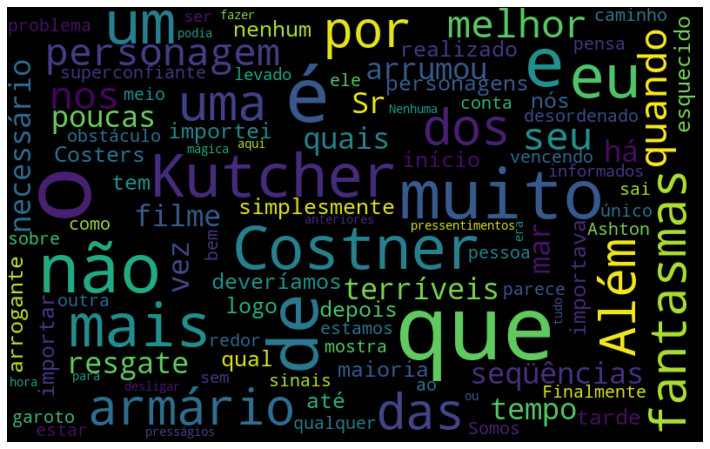

In [126]:
gera_nuvem_palavra(df, 'text_pt', 'neg')

In [14]:
frase = ['Um filme ruim', 'Um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme ruim': 1, 'Um filme bom': 1})

In [22]:
frase = 'Bem vindo ao mundo do PLN'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [27]:
todas_as_palavras = ' '.join([palavra for palavra in df.text_pt])

token_frase = token_espaco.tokenize(todas_as_palavras)
frequencia = nltk.FreqDist(token_frase)

In [38]:
df_frequencia = pd.DataFrame({'palavra': frequencia.keys(),
                               'frequência': frequencia.values()})
df_frequencia.nlargest(columns='frequência', n=10)

,palavra,frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
...,...,...
202546,Delvian;,1
202548,Henson;,1
202549,FarScape,1
49483,Ghencea.,1


In [59]:
def pareto(df, coluna_texto, quantidade):
    todas_as_palavras = ' '.join([palavra for palavra in df[coluna_texto]])
    
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_as_palavras)
    frequencia = nltk.FreqDist(token_frase)
    
    df_frequencia = pd.DataFrame({'palavra': frequencia.keys(),
                               'frequência': frequencia.values()})
    df_frequencia = df_frequencia.nlargest(columns='frequência', n=quantidade)
    total = df_frequencia['frequência'].sum()
    df_frequencia['porcentagem'] = df_frequencia['frequência'].cumsum() / total * 100    
    
    fig, ax1 = plt.subplots(figsize=(14,8))
    sns.barplot(x='palavra', y='frequência', data=df_frequencia, ax=ax1, color='gray')
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='palavra', y='porcentagem', data=df_frequencia, ax=ax2, color='red')
    ax.set_ylabel('Contagem', fontsize=14)
    plt.show()

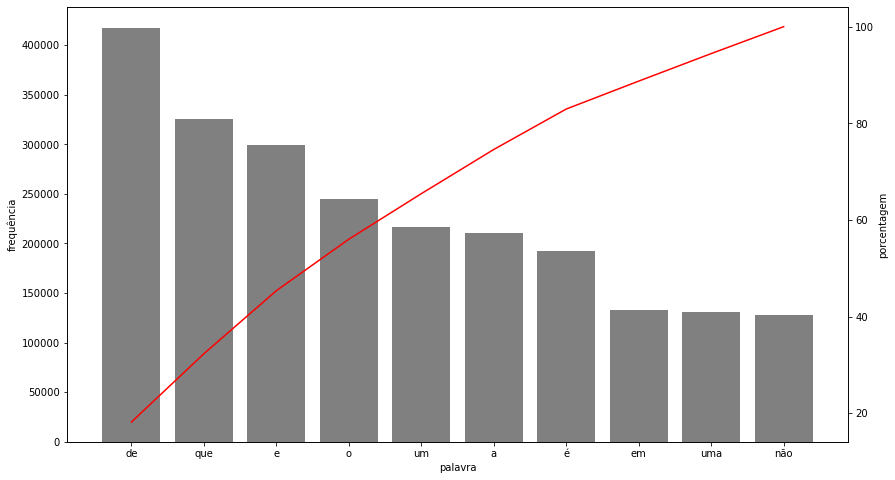

In [60]:
pareto(df, 'text_pt', 10)

In [63]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
len(palavras_irrelevantes)

204

In [65]:
frase_processada = []

for frase in df.text_pt:
    nova_frase = []
    palavras_texto = token_espaco.tokenize(frase)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df['tratamento_1'] = frase_processada

In [66]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [67]:
classificar_texto(df, 'tratamento_1', 'classificacao')

0.6607359482410028

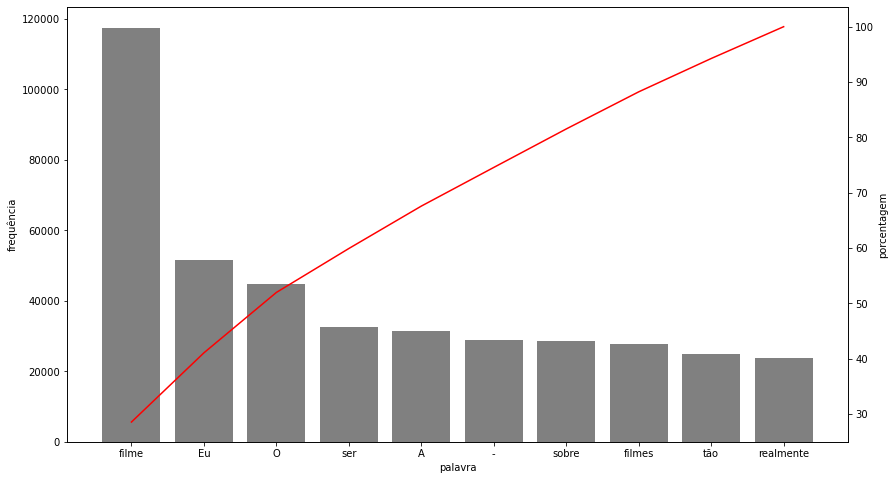

In [68]:
pareto(df, 'tratamento_1', 10)

# Linguagem Natural parte 2: Continuando com a análise de sentimento

## Objetivos
* Aprenda conceitos do Processamento de Linguagem Natural.
* Realize Análise de Sentimento de modo automatizado.
* Melhore os resultados de classificação normalizando os textos.
* Aprenda como usar TF-IDF e Ngrams para melhorar a classificação.
* Como a normalização dos textos melhora a visualização dos dados textuais.
* Avance na utilização da biblioteca NLTK.
* Aprenda a utilizar recursos do SKlearn para otimizar a classificação.

link: https://cursos.alura.com.br/course/nlp-com-analise-de-sentimento